In [ ]:
# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

### Loading Data

In [ ]:
# Data directory
DATADIR = '/content/drive/MyDrive/DeepLearning/Project/HumanActivityRecognition/HAR/UCI_HAR_Dataset'

In [ ]:
# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [ ]:
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'/content/drive/MyDrive/DeepLearning/Project/HumanActivityRecognition/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).values) 

    return np.transpose(signals_data, (1, 2, 0))

In [ ]:

def load_y(subset):
    filename = f'/content/drive/MyDrive/DeepLearning/Project/HumanActivityRecognition/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).values

In [ ]:
def load_data():
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

In [ ]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)
# Import Keras
from keras import backend as K
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

# Importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [ ]:
# Initializing parameters
epochs = 25
batch_size = 16
n_hidden = 64

In [ ]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [ ]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

In [ ]:
X_train.shape,Y_train.shape

((7352, 128, 9), (7352, 6))

## Sample plot for accelaration x axis

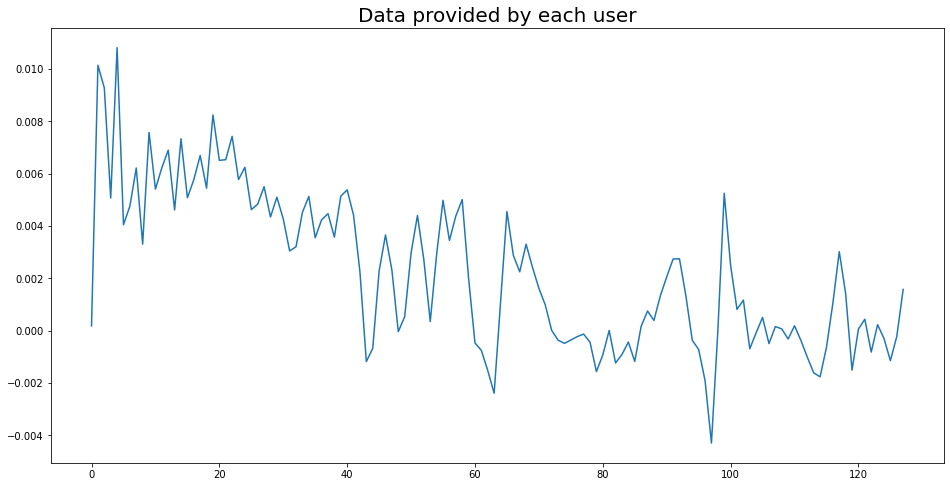

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
plt.plot(t)
plt.show()


## Defining the Architecture of LSTM

In [ ]:
# Initiliazing the sequential model
model = Sequential()

model.add(LSTM(16, input_shape=(timesteps, input_dim),return_sequences=True))
model.add(LSTM(16))
model.add(Dropout(0.4))
# Adding a dense output layer with sigmoid activation
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 128, 16)           1664      
                                                                 
 lstm_11 (LSTM)              (None, 16)                2112      
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 6)                 198       
                                                                 
Total params: 4,518
Trainable params: 4,518
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/25
7352/7352 [==============================] - ETA: 0s - loss: 1.1244 - acc: 0.5203

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


7352/7352 [==============================] - 31s 4ms/sample - loss: 1.1244 - acc: 0.5203 - val_loss: 0.8658 - val_acc: 0.6105
Epoch 2/25
7352/7352 [==============================] - 30s 4ms/sample - loss: 0.7253 - acc: 0.6541 - val_loss: 0.7459 - val_acc: 0.6719
Epoch 3/25
7352/7352 [==============================] - 30s 4ms/sample - loss: 0.6168 - acc: 0.7212 - val_loss: 0.6758 - val_acc: 0.7441
Epoch 4/25
7352/7352 [==============================] - 29s 4ms/sample - loss: 0.4601 - acc: 0.7818 - val_loss: 0.5125 - val_acc: 0.7740
Epoch 5/25
7352/7352 [==============================] - 30s 4ms/sample - loss: 0.4112 - acc: 0.8105 - val_loss: 0.5600 - val_acc: 0.7570
Epoch 6/25
7352/7352 [==============================] - 30s 4ms/sample - loss: 0.4050 - acc: 0.8298 - val_loss: 0.4072 - val_acc: 0.8493
Epoch 7/25
7352/7352 [==============================] - 29s 4ms/sample - loss: 0.3172 - acc: 0.8711 - val_loss: 0.3222 - val_acc: 0.8863
Epoch 8/25
7352/7352 [==============================

In [ ]:
# Confusion Matrix
print(confusion_matrix(Y_test, model.predict(X_test))) 

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Pred                LAYING  SITTING  ...  WALKING_DOWNSTAIRS  WALKING_UPSTAIRS
True                                 ...                                      
LAYING                 515        0  ...                   0                22
SITTING                  2      384  ...                   1                 1
STANDING                 0       98  ...                   0                 0
WALKING                  0        0  ...                  25                 0
WALKING_DOWNSTAIRS       0        0  ...                 412                 7
WALKING_UPSTAIRS         0        0  ...                   7               444

[6 rows x 6 columns]


##Viewing Some results

In [ ]:
print(X_test[0])

[[ 0.01165315 -0.02939904  0.1068262  ...  1.041216   -0.2697959
   0.02377977]
 [ 0.01310909 -0.03972867  0.1524549  ...  1.041803   -0.280025
   0.07629271]
 [ 0.01126885 -0.05240586  0.2168462  ...  1.039086   -0.2926631
   0.1474754 ]
 ...
 [ 0.00129151  0.01173502  0.00366559 ...  0.9930164  -0.2599865
   0.1443951 ]
 [ 0.00147     0.00951741  0.00404194 ...  0.9932414  -0.2620643
   0.1447033 ]
 [ 0.00257384  0.00730507  0.00488844 ...  0.9943906  -0.2641348
   0.1454939 ]]


In [ ]:
ACTIVITIES[np.argmax( model.predict(X_test[:20])[1])], ACTIVITIES[np.argmax(Y_test[0])]

('STANDING', 'STANDING')

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
labels=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def label_convert(y_label):
  y_new=[]

  for v in y_label:
    y_new.append(np.argmax(v))
    pass
  return y_new

Test Accuracy:  0.9026128266033254


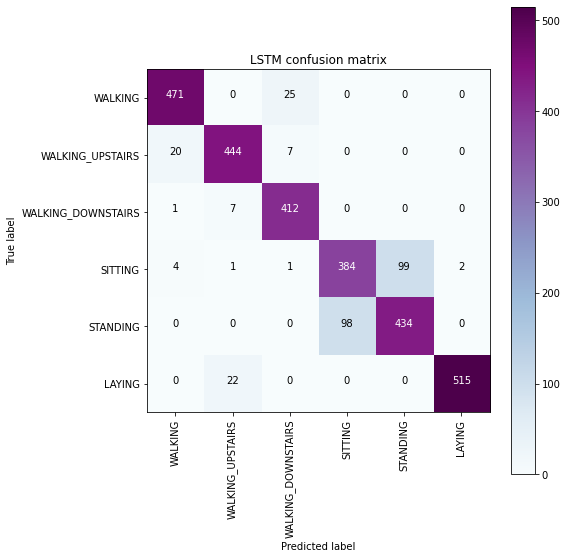

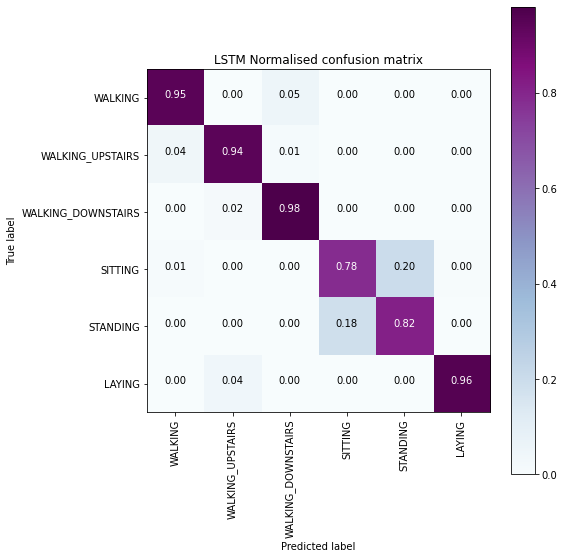

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       496
           1       0.94      0.94      0.94       471
           2       0.93      0.98      0.95       420
           3       0.80      0.78      0.79       491
           4       0.81      0.82      0.82       532
           5       1.00      0.96      0.98       537

    accuracy                           0.90      2947
   macro avg       0.90      0.91      0.90      2947
weighted avg       0.90      0.90      0.90      2947



In [ ]:
y_test = label_convert(Y_test)
# calculate overall accuracty of the model
y_pred =  label_convert(model.predict(X_test))
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

print("Test Accuracy: ",accuracy)

# plot confusin matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=labels, normalize=False, title='LSTM confusion matrix', cmap =plt.cm.BuPu)
plt.show()
print("\n")
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=labels, normalize=True, title='LSTM Normalised confusion matrix', cmap =plt.cm.BuPu)
plt.show()

classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)


###Reference:
https://paperswithcode.com/task/time-series-classification
https://sakshamchecker.medium.com/human-activity-recognition-7abaa9a1cf34
https://towardsdatascience.com/time-series-classification-for-human-activity-recognition-with-lstms-using-tensorflow-2-and-keras-b816431afdff
https://github.com/RohanJahagirdar/Human-Activity-Recognition
https://towardsdatascience.com/a-brief-introduction-to-time-series-classification-algorithms-7b4284d31b97